Name: Alexander Hermer (Ahh83)


Research Question: Based on the NYC-Rolling-Sales kaggle data file, what features most accurately predict the average NYC housing sale price?

Hypothesis: I think that taxclass, borough, and gross square footage, will be the best predictors to classify the sale price of apartment units in nyc.




In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns


#display data
data = pd.read_csv('nyc-rolling-sales.csv')

data.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


In [2]:
#visualize data to check for types of variables that need to be changed
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   Unnamed: 0                      84548 non-null  int64 
 1   BOROUGH                         84548 non-null  int64 
 2   NEIGHBORHOOD                    84548 non-null  object
 3   BUILDING CLASS CATEGORY         84548 non-null  object
 4   TAX CLASS AT PRESENT            84548 non-null  object
 5   BLOCK                           84548 non-null  int64 
 6   LOT                             84548 non-null  int64 
 7   EASE-MENT                       84548 non-null  object
 8   BUILDING CLASS AT PRESENT       84548 non-null  object
 9   ADDRESS                         84548 non-null  object
 10  APARTMENT NUMBER                84548 non-null  object
 11  ZIP CODE                        84548 non-null  int64 
 12  RESIDENTIAL UNITS               84548 non-null

In [3]:
#drop columns which are complicated/incomplete/or irrelevant
datatemp = data
data = data.drop(['Unnamed: 0','BUILDING CLASS CATEGORY', 'EASE-MENT', 'ADDRESS','SALE DATE','BUILDING CLASS AT PRESENT','TAX CLASS AT PRESENT','APARTMENT NUMBER', 'ZIP CODE', 'NEIGHBORHOOD','YEAR BUILT'], axis=1)


In [4]:
#filter data to remove the rows without a sales price
data.drop(data.index[data['SALE PRICE'] == ' -  '], inplace = True)

In [5]:
#converting important columns to float64 and numeric types
data['SALE PRICE']=data['SALE PRICE'].astype("float64")
data['LAND SQUARE FEET'] = pd.to_numeric(data['LAND SQUARE FEET'], errors='coerce')
data['GROSS SQUARE FEET']= pd.to_numeric(data['GROSS SQUARE FEET'], errors='coerce')

In [6]:
#fill square feet columns with mean values of other values in data set
data['LAND SQUARE FEET']=data['LAND SQUARE FEET'].fillna(data['LAND SQUARE FEET'].mean())
data['GROSS SQUARE FEET']=data['GROSS SQUARE FEET'].fillna(data['GROSS SQUARE FEET'].mean())

In [7]:
#convert numerically appearing variables to categorical ones
data['BOROUGH'] = data['BOROUGH'].astype('category')
data['TAX CLASS AT TIME OF SALE'] = data['TAX CLASS AT TIME OF SALE'].astype('category')
data['BUILDING CLASS AT TIME OF SALE'] = data['BUILDING CLASS AT TIME OF SALE'].astype('category')

In [8]:
#visualize data to check if variables changed properly
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 11 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   BOROUGH                         69987 non-null  category
 1   BLOCK                           69987 non-null  int64   
 2   LOT                             69987 non-null  int64   
 3   RESIDENTIAL UNITS               69987 non-null  int64   
 4   COMMERCIAL UNITS                69987 non-null  int64   
 5   TOTAL UNITS                     69987 non-null  int64   
 6   LAND SQUARE FEET                69987 non-null  float64 
 7   GROSS SQUARE FEET               69987 non-null  float64 
 8   TAX CLASS AT TIME OF SALE       69987 non-null  category
 9   BUILDING CLASS AT TIME OF SALE  69987 non-null  category
 10  SALE PRICE                      69987 non-null  float64 
dtypes: category(3), float64(3), int64(5)
memory usage: 5.1 MB


In [9]:
#Visualize Borough distributions
Borough_count = data['BOROUGH'].value_counts()
sns.set(style="darkgrid")
sns.barplot(Borough_count.index, Borough_count.values, alpha=0.9)
plt.title('Frequency Distribution of Houses in Different Boroughs')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Borough', fontsize=12)
plt.show()

TypeError: barplot() takes from 0 to 1 positional arguments but 2 were given

In [ ]:
#Visualize Tax Classes distributions
TC_count = data['TAX CLASS AT TIME OF SALE'].value_counts()
sns.set(style="darkgrid")
sns.barplot(TC_count.index, TC_count.values, alpha=0.9)
plt.title('Frequency Distribution of Tax Classes of properties')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Tax Class', fontsize=12)
plt.show()

In [ ]:
#Visualize Building Class At Time of Sale distributions
BC_count = data['BUILDING CLASS AT TIME OF SALE'].value_counts()
sns.set(style="darkgrid")
sns.barplot(BC_count.index, BC_count.values, alpha=0.9)
plt.title('Frequency Distribution of Building Classes of properties')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Building Class', fontsize=12)
plt.show()

In [ ]:
#investigate building class counts to be cleaned
data['BUILDING CLASS AT TIME OF SALE'].value_counts()

In [10]:
#Hardcoding the various building classes into broader classes. I learned from the following source:
#https://www1.nyc.gov/assets/finance/jump/hlpbldgcode.html that classes are similar by letter, so it seems like
#an appropriate grouping I can make.


#Convert A building sub-Classes to A broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A0", "A")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A1", "A")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A2", "A")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A3", "A")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A4", "A")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A5", "A")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A6", "A")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A7", "A")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A8", "A")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("A9", "A")


#Convert B building sub-Classes to B broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("B1", "B")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("B2", "B")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("B3", "B")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("B9", "B")

#Convert C building sub-Classes to C broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C0", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C1", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C2", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C3", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C4", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C5", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C6", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C7", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C8", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("C9", "C")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("CM", "C")


#Convert D building sub-Classes to D broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D0", "D")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D1", "D")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D2", "D")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D3", "D")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D4", "D")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D5", "D")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D6", "D")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D7", "D")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D8", "D")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("D9", "D")


#Convert E building sub-Classes to E broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("E1", "E")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("E2", "E")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("E3", "E")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("E4", "E")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("E5", "E")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("E7", "E")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("E9", "E")

#Convert F building sub-Classes to F broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("F1", "F")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("F2", "F")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("F4", "F")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("F5", "F")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("F8", "F")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("F9", "F")

#Convert G building sub-Classes to G broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G0", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G1", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G2", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G3", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G4", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G5", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G6", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G7", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G8", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("G9", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("GU", "G")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("GW", "G")

#Convert H building sub-Classes to H broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("HB", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("HH", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("HR", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("HS", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("H1", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("H2", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("H3", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("H4", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("H5", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("H6", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("H7", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("H8", "H")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("H9", "H")

#Convert I building sub-Classes to I broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("I1", "I")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("I2", "I")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("I3", "I")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("I4", "I")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("I5", "I")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("I6", "I")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("I7", "I")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("I9", "I")

#Convert J building sub-Classes to J broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("J1", "J")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("J2", "J")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("J3", "J")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("J4", "J")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("J5", "J")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("J6", "J")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("J7", "J")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("J8", "J")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("J9", "J")

#Convert K building sub-Classes to K broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("K1", "K")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("K2", "K")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("K3", "K")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("K4", "K")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("K5", "K")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("K6", "K")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("K7", "K")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("K8", "K")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("K9", "K")

#Convert L building sub-Classes to L broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("L1", "L")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("L2", "L")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("L3", "L")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("L8", "L")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("L9", "L")

#Convert M building sub-Classes to M broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("M1", "M")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("M2", "M")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("M3", "M")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("M4", "M")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("M9", "M")

#Convert N building sub-Classes to N broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("N1", "N")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("N2", "N")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("N3", "N")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("N4", "N")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("N9", "N")

#Convert O building sub-Classes to O broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("O1", "O")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("O2", "O")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("O3", "O")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("O4", "O")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("O5", "O")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("O6", "O")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("O7", "O")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("O8", "O")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("O9", "O")

#Convert P building sub-Classes to P broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("P1", "P")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("P2", "P")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("P3", "P")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("P4", "P")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("P5", "P")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("P6", "P")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("P7", "P")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("P8", "P")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("P9", "P")

#Convert Q building sub-Classes to Q broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Q1", "Q")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Q2", "Q")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Q3", "Q")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Q4", "Q")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Q5", "Q")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Q6", "Q")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Q7", "Q")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Q8", "Q")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Q9", "Q")

#Convert R building sub-Classes to R broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RA", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RB", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RG", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RH", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RK", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RP", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RR", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RS", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RT", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RW", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R0", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R1", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R2", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R3", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R4", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R5", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R6", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R7", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R8", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("R9", "R")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("RR", "R")
                                                                                       
#Convert S building sub-Classes to S broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("S0", "S")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("S1", "S")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("S2", "S")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("S3", "S")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("S4", "S")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("S5", "S")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("S9", "S")

#Convert T building sub-Classes to T broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("T1", "T")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("T2", "T")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("T9", "T")

#Convert U building sub-Classes to U broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U0", "U")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U1", "U")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U2", "U")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U3", "U")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U4", "U")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U5", "U")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U6", "U")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U7", "U")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U8", "U")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("U9", "U")
                                                                                       
#Convert V building sub-Classes to V broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V0", "V")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V1", "V")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V2", "V")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V3", "V")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V4", "V")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V5", "V")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V6", "V")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V7", "V")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V8", "V")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("V9", "V")
                                                                                       
#Convert W building sub-Classes to W broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("W1", "W")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("W2", "W")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("W3", "W")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("W4", "W")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("W5", "W")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("W6", "W")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("W7", "W")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("W8", "W")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("W9", "W")
                                                                                       
#Convert Y building sub-Classes to Y broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Y1", "Y")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Y2", "Y")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Y3", "Y")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Y4", "Y")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Y5", "Y")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Y6", "Y")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Y7", "Y")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Y8", "Y")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Y9", "Y")

#Convert Z building sub-Classes to Z broad class
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z0", "Z")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z1", "Z")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z2", "Z")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z3", "Z")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z4", "Z")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z5", "Z")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z6", "Z")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z7", "Z")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z8", "Z")
data['BUILDING CLASS AT TIME OF SALE']= data['BUILDING CLASS AT TIME OF SALE'].replace("Z9", "Z")


In [11]:
#investigate building class after hardcoding
data['BUILDING CLASS AT TIME OF SALE'].value_counts()

R    17136
A    14155
B    12408
D    12140
C     9019
S     1544
V     1089
K      725
G      556
O      281
E      252
F      170
Z      146
H      109
M       78
W       44
I       43
P       28
L       26
N       20
Q        7
J        5
T        2
U        2
Y        2
Name: BUILDING CLASS AT TIME OF SALE, dtype: int64

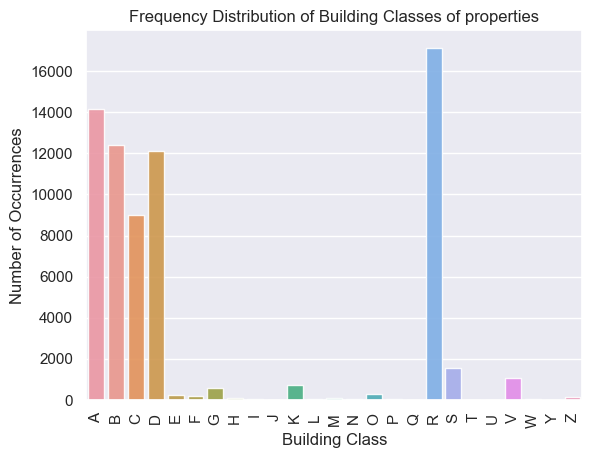

In [21]:
BC_count = data['BUILDING CLASS AT TIME OF SALE'].value_counts()
sns.set(style="darkgrid")
sns.barplot(x=BC_count.index, y=BC_count.values, alpha=0.9)
plt.title('Frequency Distribution of Building Classes of properties')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Building Class', fontsize=12)
plt.xticks(rotation=90)  # This is to rotate the x-axis labels for better readability
plt.show()

In [13]:
#onehot encoding my three categorical variables
data_onehot = data.copy()
data_onehot = pd.get_dummies(data_onehot, columns=['BOROUGH'], prefix = ['BOROUGH'])
data_onehot = pd.get_dummies(data_onehot, columns=['TAX CLASS AT TIME OF SALE'], prefix = ['TAX CLASS AT TIME OF SALE'])
data_onehot = pd.get_dummies(data_onehot, columns=['BUILDING CLASS AT TIME OF SALE'], prefix = ['BUILDING CLASS AT TIME OF SALE'])

data_onehot.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69987 entries, 0 to 84547
Data columns (total 42 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BLOCK                             69987 non-null  int64  
 1   LOT                               69987 non-null  int64  
 2   RESIDENTIAL UNITS                 69987 non-null  int64  
 3   COMMERCIAL UNITS                  69987 non-null  int64  
 4   TOTAL UNITS                       69987 non-null  int64  
 5   LAND SQUARE FEET                  69987 non-null  float64
 6   GROSS SQUARE FEET                 69987 non-null  float64
 7   SALE PRICE                        69987 non-null  float64
 8   BOROUGH_1                         69987 non-null  uint8  
 9   BOROUGH_2                         69987 non-null  uint8  
 10  BOROUGH_3                         69987 non-null  uint8  
 11  BOROUGH_4                         69987 non-null  uint8  
 12  BORO

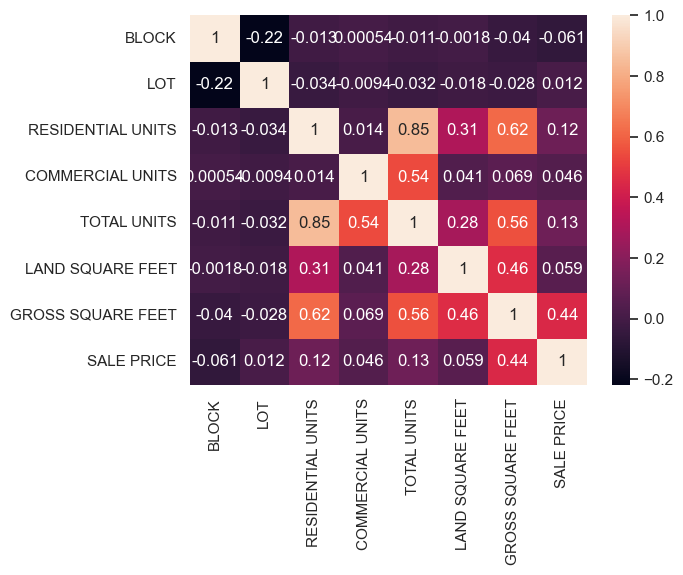

In [14]:
#correlation matrix for numeric variables
corr = data.corr() 
sns.heatmap(corr, annot=True) 
plt.show()


In [15]:
#correlation list (due to number of encoded elements) for encoded categorical variables
corr = data_onehot.corr()
corr[['SALE PRICE']]     


,SALE PRICE
BLOCK,-0.061139
LOT,0.012324
RESIDENTIAL UNITS,0.119698
COMMERCIAL UNITS,0.046006
TOTAL UNITS,0.125101
LAND SQUARE FEET,0.059021
GROSS SQUARE FEET,0.444408
SALE PRICE,1.000000
BOROUGH_1,0.092154
BOROUGH_2,-0.020137


In [16]:
#only included highest correlated features to pick from from last models
results = corr.loc[corr['SALE PRICE'] > .02] 
results[['SALE PRICE']]

,SALE PRICE
RESIDENTIAL UNITS,0.119698
COMMERCIAL UNITS,0.046006
TOTAL UNITS,0.125101
LAND SQUARE FEET,0.059021
GROSS SQUARE FEET,0.444408
SALE PRICE,1.000000
BOROUGH_1,0.092154
TAX CLASS AT TIME OF SALE_4,0.087140
BUILDING CLASS AT TIME OF SALE_H,0.076370
BUILDING CLASS AT TIME OF SALE_O,0.167328


In [17]:
#First Linear Regression Model that tests all cleaned variables
X = data_onehot.drop(['SALE PRICE'], axis = 1)
Y = data_onehot['SALE PRICE']        
X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size = 0.2, random_state = 42)
model = LinearRegression()
model.fit(X_tr, Y_tr)
print("Best training score:", model.score(X_tr,Y_tr))
print("Best testing score:", model.score(X_te,Y_te))


Best training score: 0.32413913492805824
Best testing score: 0.1876923949137822


In [18]:
#Second Linear Regression Model

best_tr = 0
best_te = 0
best_i = 0


xx = ['RESIDENTIAL UNITS','COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH_1','TAX CLASS AT TIME OF SALE_4','BUILDING CLASS AT TIME OF SALE_H','BUILDING CLASS AT TIME OF SALE_O']

for i in range(0,len(xx)):
        X = data_onehot[[xx[i]]]
        Y = data_onehot['SALE PRICE']             
        X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size = 0.2, random_state = 42)
        model = LinearRegression()
        model.fit(X_tr, Y_tr)
        trsc = model.score(X_tr,Y_tr)
        tesc = model.score(X_te,Y_te)
        if best_tr < trsc and best_te < tesc:
            best_tr = trsc
            best_te = tesc
            best_i = i
                

print("Best training score:", model.score(X_tr,Y_tr))
print("Best testing score:", model.score(X_te,Y_te))
print("Best predictor:", xx[best_i])

Best training score: 0.040534951479507364
Best testing score: 0.0183561242031276
Best predictor: GROSS SQUARE FEET


In [19]:
#Third Linear Regression Model


best_tr = 0
best_te = 0
best_i = 0
best_j = 0


xx = ['RESIDENTIAL UNITS','COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH_1','TAX CLASS AT TIME OF SALE_4','BUILDING CLASS AT TIME OF SALE_H','BUILDING CLASS AT TIME OF SALE_O']
yy = ['RESIDENTIAL UNITS','COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH_1','TAX CLASS AT TIME OF SALE_4','BUILDING CLASS AT TIME OF SALE_H','BUILDING CLASS AT TIME OF SALE_O']

for i in range(0,len(xx)):
    for j in range(0,len(yy)):
        if xx[i]!= yy[j]:
            X = data_onehot[[xx[i],yy[j]]]
            Y = data_onehot['SALE PRICE']             
            X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size = 0.2, random_state = 42)
            model = LinearRegression()
            model.fit(X_tr, Y_tr)
            trsc = model.score(X_tr,Y_tr)
            tesc = model.score(X_te,Y_te)
            if best_tr < trsc and best_te < tesc:
                best_tr = trsc
                best_te = tesc
                best_i = i
                best_j = j
                

print("Best training score:", model.score(X_tr,Y_tr))
print("Best testing score:", model.score(X_te,Y_te))
print("Best column combination:", xx[best_i],"  &  ", yy[best_j])





Best training score: 0.057591655924035035
Best testing score: 0.01600672116071178
Best column combination: LAND SQUARE FEET   &   GROSS SQUARE FEET


In [20]:
#Fourth Linear Regression Model (takes a while to run)

best_tr = 0
best_te = 0
best_i = 0
best_j = 0
best_k = 0

xx = ['RESIDENTIAL UNITS','COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH_1','TAX CLASS AT TIME OF SALE_4','BUILDING CLASS AT TIME OF SALE_H','BUILDING CLASS AT TIME OF SALE_O']
yy = ['RESIDENTIAL UNITS','COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH_1','TAX CLASS AT TIME OF SALE_4','BUILDING CLASS AT TIME OF SALE_H','BUILDING CLASS AT TIME OF SALE_O']
zz = ['RESIDENTIAL UNITS','COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'BOROUGH_1','TAX CLASS AT TIME OF SALE_4','BUILDING CLASS AT TIME OF SALE_H','BUILDING CLASS AT TIME OF SALE_O']


for i in range(0,len(xx)):
    for j in range(0,len(yy)):
        for k in range(0,len(zz)):
            if xx[i]!= yy[j] and yy[j]!= zz[k] and xx[i]!=zz[k]:
                X = data_onehot[[xx[i],yy[j],zz[k]]]
                Y = data_onehot['SALE PRICE']             
                X_tr, X_te, Y_tr, Y_te = train_test_split(X, Y, test_size = 0.2, random_state = 42)
                model = LinearRegression()
                model.fit(X_tr, Y_tr)
                trsc = model.score(X_tr,Y_tr)
                tesc = model.score(X_te,Y_te)
                if best_tr < trsc and best_te < tesc:
                    best_tr = trsc
                    best_te = tesc
                    best_i = i
                    best_j = j
                    best_k = k
                

print("Best training score:", model.score(X_tr,Y_tr))
print("Best testing score:", model.score(X_te,Y_te))
print("Best column combination:", xx[best_i],"  &  ", yy[best_j],"  &  ",zz[best_k])





Best training score: 0.05929653858455097
Best testing score: 0.016841532281629434
Best column combination: RESIDENTIAL UNITS   &   LAND SQUARE FEET   &   GROSS SQUARE FEET
